In [1]:
%matplotlib inline
from refer import REFER
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load Refer Dataset

In [2]:
data_root = '../../dataset/anns/original'  # contains refcoco, refcoco+, refcocog, refgta
dataset = 'refgta'
splitBy = 'utokyo'

# contains image
if 'refcoco' in dataset:
    ## MSCOCO image path
    image_root = '../../dataset/coco_image/train2014'
else:
    ## GTA image path
    image_root = '../../dataset/gta_image/gtav_cv_mod_data/'
refer = REFER(data_root, image_root, dataset, splitBy)

loading dataset refgta into memory...
../../dataset/anns/original/ref2/refgta
creating index...
index created.
DONE (t=36.11s)


# Stats about the Dataset

In [3]:
# print stats about the given dataset
print ('dataset [%s_%s] contains: ' % (dataset, splitBy))
ref_ids = refer.getRefIds()
image_ids = refer.getImgIds()
print ('%s expressions for %s refs in %s images.' % (len(refer.Sents), len(ref_ids), len(image_ids)))

print ('\nAmong them:')
if dataset == 'refclef':
    if splitBy == 'unc':
        splits = ['train', 'val', 'testA', 'testB', 'testC']
    else:
        splits = ['train', 'val', 'test']
elif dataset == 'refcoco':
    splits = ['train', 'val', 'test']
elif dataset == 'refcoco+':
    splits = ['train', 'val', 'test']
elif dataset == 'refcocog':
    splits = ['train', 'val']  # we don't have test split for refcocog right now.
elif dataset == 'refgta':
    splits = ['train','val','test']
    
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    print ('%s refs are in split [%s].' % (len(ref_ids), split))
    
print('\nSents info:')
all_sent_num = 0
sent_length = 0
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    sent_num = 0
    images = []
    for ref_id in ref_ids:
        ref = refer.Refs[ref_id]
        sent_num += len(ref['sent_ids'])
        images.append(ref['file_name'])
        sent_length += sum([len(sent['tokens']) for sent in refer.Refs[ref_id]['sentences']])
    all_sent_num += sent_num
    print ('%s ref expressions | %s images are in split [%s].' % (sent_num, len(list(set(images))), split))
print ('mean length is %s .' % (sent_length/all_sent_num))

dataset [refgta_utokyo] contains: 
213175 expressions for 78272 refs in 28750 images.

Among them:
65205 refs are in split [train].
6563 refs are in split [val].
6504 refs are in split [test].

Sents info:
177763 ref expressions | 23950 images are in split [train].
17766 ref expressions | 2395 images are in split [val].
17646 ref expressions | 2405 images are in split [test].
mean length is 10.05871701653571 .


# Show Refered Object and its Expressions

In [13]:
# randomly sample one ref
ref_ids = refer.getRefIds()
ref_id = ref_ids[np.random.randint(0, len(ref_ids))]
ref = refer.Refs[ref_id]
print(ref['split'])
print ('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
if dataset in ['refcoco','refcoco+','refcocog']:
    plt.figure()
    refer.showRef(ref, seg_box='seg')
    plt.show()

train
ref_id [18111] (ann_id [28785])


1. a man walking on his back with a purple waistcoat and gray pants
[Acc]:80.00%, [time] median:12.34,mean:13.74
2. a person with a blue top and is near trees
[Acc]:80.00%, [time] median:6.89,mean:6.82
3. woman in purple walking near palm tree
[Acc]:100.00%, [time] median:2.94,mean:2.84


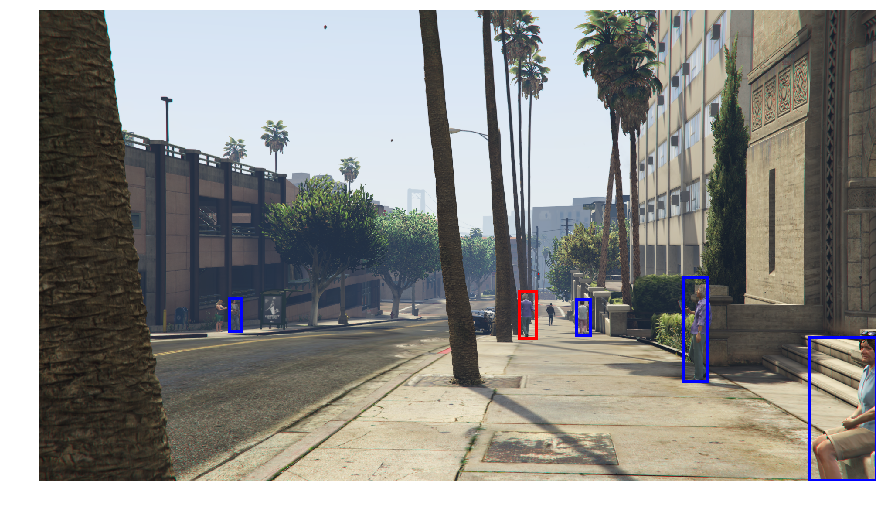

In [14]:
# or show the bounding box of the referred object
plt.figure(figsize=(15,12))
refer.showRef(ref, seg_box='box')
plt.axis('off')
plt.show()

In [15]:
# let's look at the details of each ref

if dataset in ['refcoco','refcoco+','refcocog']:
    for i,sent in enumerate(ref['sentences']):
        print ('sent_id[%s]: %s' % (sent['sent_id'], sent['sent']))
elif dataset in ['refgta']:
    rank = refer.get_rank1(ref)
    for i,sent in enumerate(ref['sentences']):
        sent_info = sent['info']
        times = sorted([one_info['time'] for one_info in sent_info])[1:-1]
        time_mean = np.mean(times)
        SD = np.sqrt(np.var(times)*len(times)/(len(times)-1))
        SE = SD/np.sqrt(len(times))
        print ('rank : [%s], sent_id[%s]: %s' % (str(rank[i]), sent['sent_id'], sent['sent']))
        print('{0:.2f}±{1:.2f}'.format(time_mean/1000,SE/1000))

rank : [2.0], sent_id[49373]: a man walking on his back with a purple waistcoat and gray pants
13.74±1.46
rank : [2.0], sent_id[49374]: a person with a blue top and is near trees
6.82±0.56
rank : [1.0], sent_id[49375]: woman in purple walking near palm tree
2.84±0.34
